In [ ]:
# Test_241127

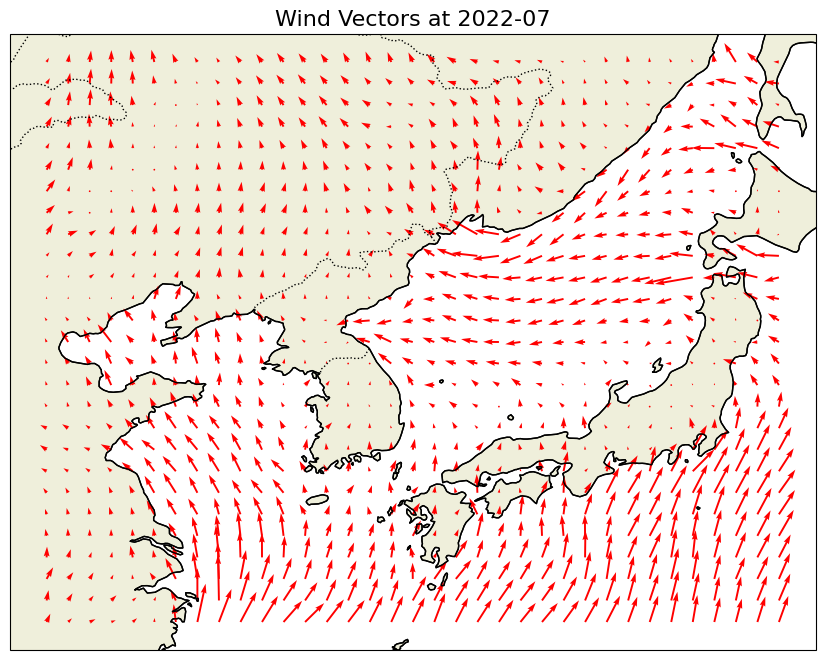

In [4]:
### 바람 벡터 (eastward_wind & northward_wind) 시각화
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# 파일 열기
file_path = 'F:\BigDataProcessing\wind_monthly_202207.nc'
dataset = xr.open_dataset(file_path, mode='r', engine='netcdf4')


# 변수 목록 확인
# print(dataset)

# 변수 읽기
eastward_wind = dataset['eastward_wind'][0,:,:].values     # (time, latitude, longitude)
northward_wind = dataset['northward_wind'][0,:,:].values   # (time, latitude, longitude)
wind_speed = dataset['wind_speed'][0,:,:].values           # (time, latitude, longitude)

time = dataset['time'][0].values
lon = dataset['longitude'].values
lat = dataset['latitude'].values

# 시각화
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# 벡터 화살표 추가
plt.quiver(lon[::3], lat[::3], eastward_wind[::3, ::3], northward_wind[::3, ::3], 
           scale=100, transform=ccrs.PlateCarree(), color='red')

# 지도 요소 추가
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.set_title(f'Wind Vectors at {np.datetime_as_string(time, unit="M")}', fontsize=16)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



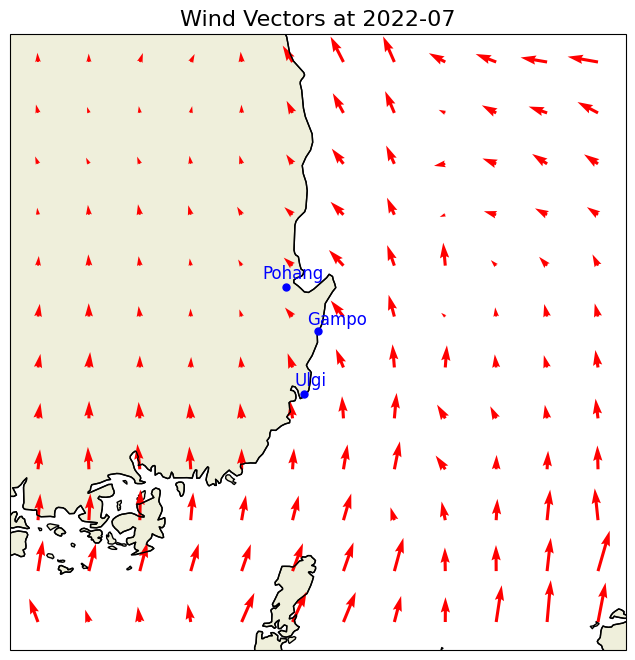

In [29]:
### 바람 벡터 in ROI (eastward_wind & northward_wind) 시각화
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from adjustText import adjust_text


# 파일 열기
file_path = 'F:\BigDataProcessing\wind_monthly_202207_ROI.nc'
dataset = xr.open_dataset(file_path, mode='r')

# 변수 목록 확인
# print(dataset)

# 변수 읽기
eastward_wind = dataset['eastward_wind'][0,:,:].values     # (time, latitude, longitude)
northward_wind = dataset['northward_wind'][0,:,:].values   # (time, latitude, longitude)
wind_speed = dataset['wind_speed'][0,:,:].values           # (time, latitude, longitude)

time = dataset['time'][0].values
lon = dataset['longitude'].values
lat = dataset['latitude'].values

# 시각화
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())


# 벡터 화살표 추가
plt.quiver(lon, lat, eastward_wind, northward_wind, 
           scale=30, transform=ccrs.PlateCarree(), color='red')

# 지도 요소 추가
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.set_title(f'Wind Vectors at {np.datetime_as_string(time, unit="M")}', fontsize=16)

# Add labels for each point
labels = ['Pohang','Gampo', 'Ulgi']
llon = [129.343, 129.501, 129.431]
llat = [36.019, 35.805, 35.4927]

# 텍스트 객체 생성
texts = [plt.text(xpt, ypt, label, fontsize=12, ha='center', va='bottom', color='blue')
         for label, xpt, ypt in zip(labels, llon, llat)]

# 레이블 중복 해결
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Plot the points
plt.plot(llon, llat, 'bo', markersize=5, label='Point of Interest')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



C:\Users\sanggyu1008\AppData\Local\Temp\ipykernel_10488\3605947436.py:51: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(label='SST (°C)')


그림이 'SST 2023-07-24 ROI.png'로 저장되었습니다.


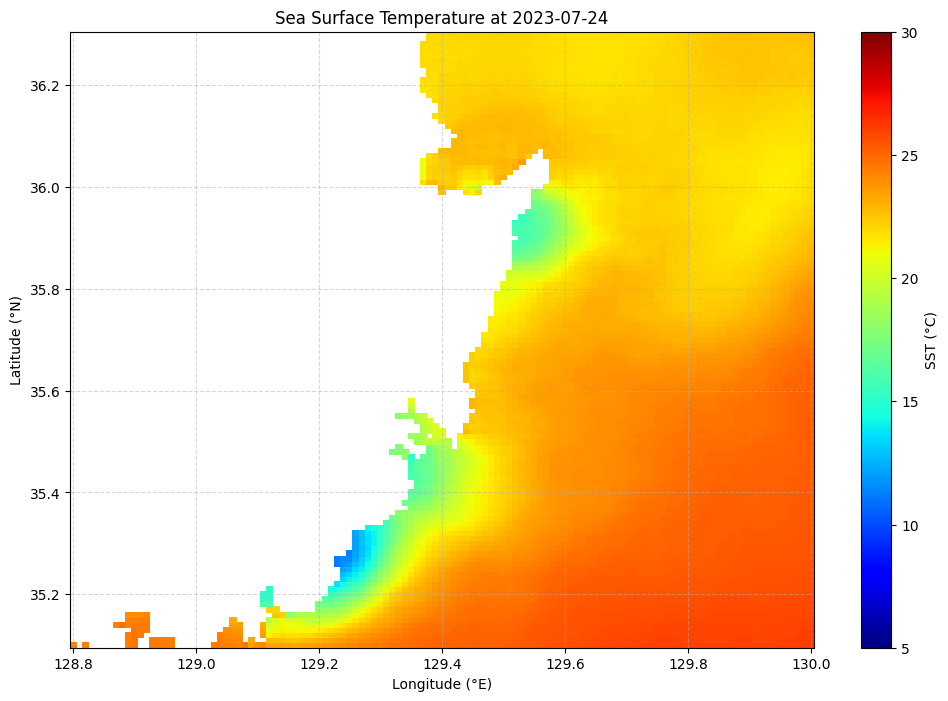

In [ ]:
### SST (KHOA) 시각화 - pcolor
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# 데이터 경로 설정
data = nc.Dataset('F:\\BigDataProcessing\\KHOA_SST_L4_Z003_D01_WGS001K_U20230724.nc')

# 변수 추출
time = data['time'][:].data
lon = data['lon'][:].data
lat = data['lat'][:].data
sst = data['sst'][:].data

# SST 데이터 유효값 필터링
sst[sst <= -999] = np.nan  # 결측값 처리

# 'time' 데이터 변환 (시작 시간 + 경과 시간)
time_since_str = data['time'].units
time_start_str = time_since_str[12:31]
time_str = dt.datetime.strptime(time_start_str, '%Y-%m-%d %H:%M:%S') + dt.timedelta(hours=int(time[0]))

# 경위도 격자 생성
meshlon, meshlat = np.meshgrid(lon, lat)

# NetCDF 파일의 data dimension 변경
sst = np.squeeze(sst) 

# 관심 영역(ROI) 설정
# bbox = [126, 132, 33.5, 37.5]  # [min_lon, max_lon, min_lat, max_lat]
bbox = [128.8, 130, 35.1, 36.3]  # 동해남부해역

roi_cond = (meshlon >= bbox[0]) & (meshlon <= bbox[1]) & (meshlat >= bbox[2]) & (meshlat <= bbox[3])

# 관심 영역 내 데이터 추출
roi_sst = sst[roi_cond]
roi_lon = meshlon[roi_cond]
roi_lat = meshlat[roi_cond]

# 2D 형식으로 변환
unique_lon = np.unique(roi_lon)
unique_lat = np.unique(roi_lat)
roi_sst_2d = roi_sst.reshape(len(unique_lat), len(unique_lon))

# 시각화
plt.figure(figsize=(12, 8))

# 관심 영역만 컬러 맵으로 표시
plt.pcolor(unique_lon, unique_lat, roi_sst_2d, cmap='jet', vmin=5, vmax=30)
plt.colorbar(label='SST (°C)')

plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')
plt.title(f'Sea Surface Temperature at {time_str:%Y-%m-%d}')
plt.grid(visible=True, linestyle='--', alpha=0.5)

# 그림 저장
output_file = f'SST {time_str:%Y-%m-%d} ROI.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"그림이 '{output_file}'로 저장되었습니다.")

plt.show()

그림이 'SST 2022-07-15 contour ROI.png'로 저장되었습니다.


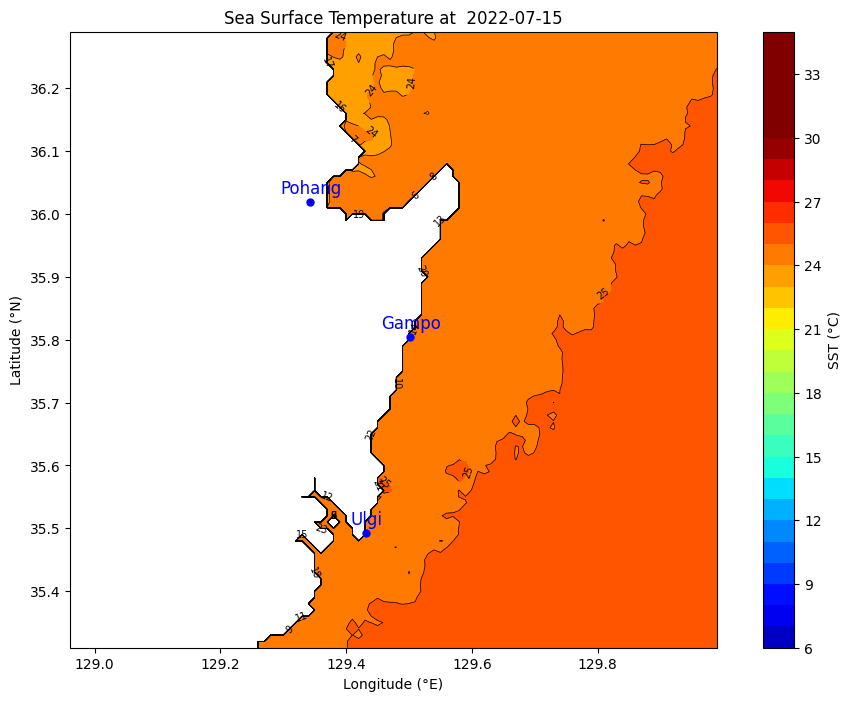

In [ ]:
### SST (KHOA) 시각화 - contour
import netCDF4 as nc 
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from adjustText import adjust_text

# 데이터 경로 설정
data = nc.Dataset('F:\\BigDataProcessing\\KHOA_SST_L4_Z003_D01_WGS001K_U20220715.nc')

# 변수 추출
time = data['time'][:].data
lon = data['lon'][:].data
lat = data['lat'][:].data
sst = data['sst'][:].data

# 데이터 필터링
sst_tmp = sst[sst > -999]
sst_min = np.nanmin(sst_tmp)
sst_max = np.nanmax(sst_tmp)

# 'time' 데이터 변환 (시작시간 + 경과시간)
time_since_str = data['time'].units     
time_since_str = time_since_str[12:31]  
time_str = dt.datetime.strptime(time_since_str, '%Y-%m-%d %H:%M:%S') + dt.timedelta(hours=int(time[0]))

# 경위도 좌표를 격자 형태로 변환
meshlon, meshlat = np.meshgrid(lon, lat)

# NetCDF 파일의 data dimension 변경
d, r, c = sst.shape
sst = np.squeeze(sst)

# 관심 영역(ROI) 설정
# bbox = [126, 132, 33.5, 37.5]  # [min_lon, max_lon, min_lat, max_lat]
bbox = [129, 130, 35.3, 36.3]  # 동해남부해역
# bbox = [129.2, 129.5, 35.1, 35.4]  # ????

cond = (bbox[0] < meshlon) & (meshlon < bbox[1]) & (bbox[2] < meshlat) & (meshlat < bbox[3])
sst[~cond] = np.nan

# 관심 영역 이외의 데이터 삭제
cond_x = np.sum(cond, axis=0) != 0
cond_y = np.sum(cond, axis=1) != 0
rev_r, rev_c = np.sum(cond_x), np.sum(cond_y)

rev_sst = sst[~np.isnan(sst)].reshape(rev_r, rev_c)
rev_meshlon = meshlon[~np.isnan(sst)].reshape(rev_r, rev_c)
rev_meshlat = meshlat[~np.isnan(sst)].reshape(rev_r, rev_c)

# 가시화
levels = np.arange(np.floor(sst_min), np.ceil(sst_max) + 1, 1) 

plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())

contour_fill = plt.contourf(rev_meshlon, rev_meshlat, rev_sst, cmap='jet', levels=levels, vmin=5, vmax=30)

plt.colorbar(label='SST (°C)')

contour_line = plt.contour(rev_meshlon, rev_meshlat, rev_sst, colors='black', levels=levels, linewidths=0.5)

# 지도 요소 추가
# ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title(f'Sea Surface Temperature at {time_str:%Y-%m-%d}')

# 경도와 위도 범위 및 라벨 추가
ax.set_xticks(np.arange(bbox[0], bbox[1], 0.2), crs=ccrs.PlateCarree())  # 경도 범위
ax.set_yticks(np.arange(bbox[2], bbox[3] , 0.1), crs=ccrs.PlateCarree())  # 위도 범위
ax.set_xlabel('Longitude (°E)')
ax.set_ylabel('Latitude (°N)')

plt.clabel(contour_line, inline=True, fontsize=7, fmt='%d', inline_spacing=10)

# Add labels for each point
labels = ['Pohang','Gampo', 'Ulgi']
llon = [129.343, 129.501, 129.431]
llat = [36.019, 35.805, 35.4927]

texts = [ax.text(xpt, ypt, label, transform=ccrs.PlateCarree(),
                 fontsize=12, ha='center', va='bottom', color='blue')
        for label, xpt, ypt in zip(labels, llon, llat)]

# label 중복해결
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Plot the point
ax.plot(llon, llat, 'bo', markersize=5,
        transform=ccrs.PlateCarree(), label='Point of Interest')

# 그림 저장
output_file = f'SST {time_str:%Y-%m-%d} contour ROI.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"그림이 '{output_file}'로 저장되었습니다.")

plt.show()

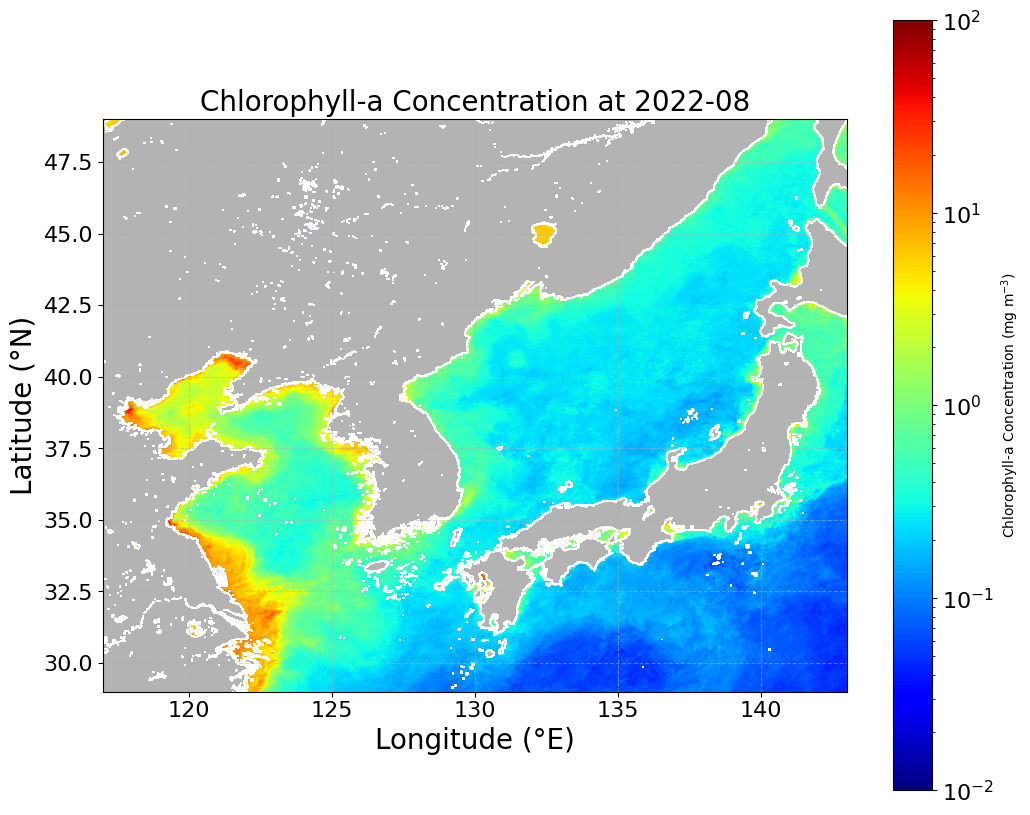

그림이 'Chlorophyll-a 2022-08.png'로 저장되었습니다.


In [1]:
### CHL (NMEW) 시각화
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from netCDF4 import Dataset, num2date

# Input file and data visualization settings
file = 'F:\\BigDataProcessing\\GS202208_CHL_NW_month.nc'
varname = 'chlor_a'
font_size = 20
cmin, cmax = 0.01, 100

# Use log norm for chlorophyll-a data
norm = colors.LogNorm(vmin=cmin, vmax=cmax)

# Read the Dataset and Geo-ref data
with Dataset(file, 'r') as nc:
    sds = nc[varname][:]  # the output is a numpy masked array
    sds = np.ma.squeeze(sds)  # Remove singleton dimensions
    lat = nc['lat'][:]
    lon = nc['lon'][:]
    time = num2date(nc['time'][:], units=nc['time'].units, calendar=nc['time'].calendar)[0]  # Assuming single time
    label = nc[varname].long_name.split(',')[0] + ' [mg m-3]'  # Extract variable name and unit

# Visualization without basemap
plt.figure(figsize=(12, 10))
extent = [lon.min(), lon.max(), lat.min(), lat.max()]

# Land mask
land_mask = np.where(~sds.mask, np.nan, 1)

# Plot the land mask
plt.imshow(land_mask, cmap='gray', extent=extent, alpha=0.3, origin='upper')

# Plot the chlorophyll-a data
im = plt.imshow(sds, extent=extent, norm=norm, cmap='jet', origin='upper')

# Colorbar
cbar = plt.colorbar(im, label='Chlorophyll-a Concentration (mg m$^{-3}$)')
cbar.ax.tick_params(labelsize=font_size - 4)

# Add title and labels
plt.title(f'Chlorophyll-a Concentration at {time.strftime("%Y-%m")}', fontsize=font_size)
plt.xlabel('Longitude (°E)', fontsize=font_size)
plt.ylabel('Latitude (°N)', fontsize=font_size)
plt.xticks(fontsize=font_size - 4)
plt.yticks(fontsize=font_size - 4)

plt.grid(visible=True, linestyle='--', alpha=0.5)

# Save the plot
output_file = f'Chlorophyll-a {time:%Y-%m}.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()

print(f"그림이 '{output_file}'로 저장되었습니다.")


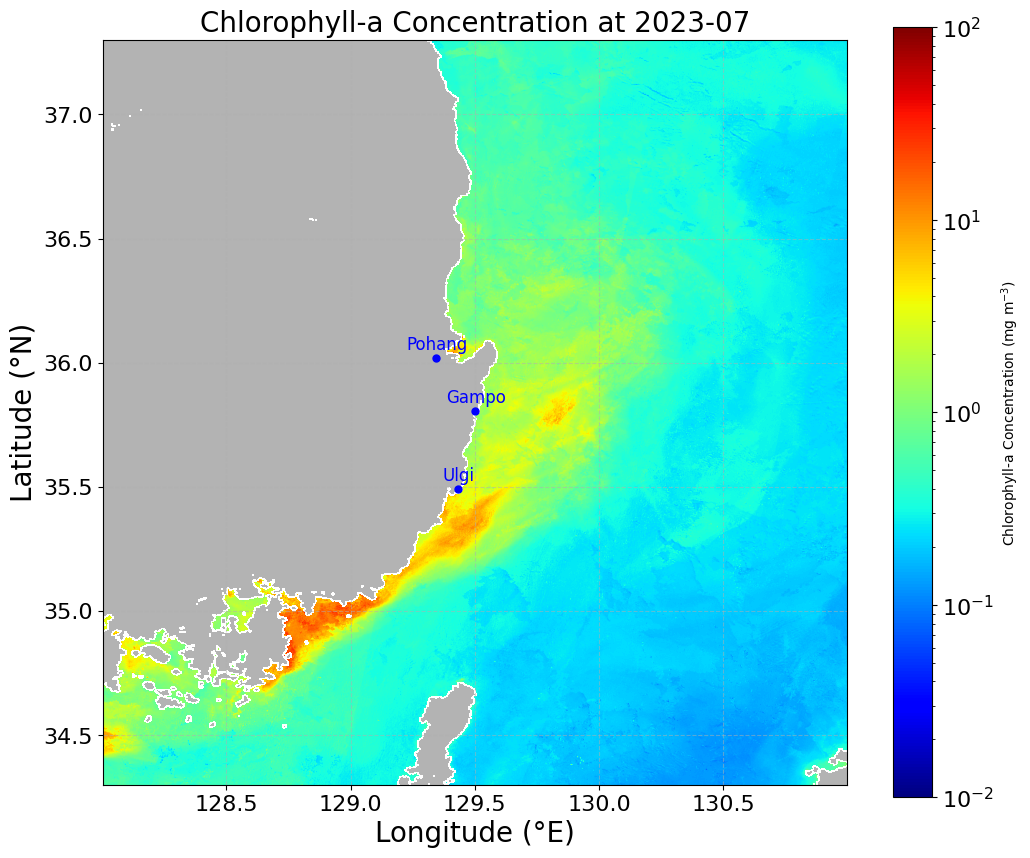

그림이 'Chlorophyll-a_2023-07_ROI.png'로 저장되었습니다.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from netCDF4 import Dataset, num2date
from adjustText import adjust_text

# Input file and data visualization settings
file = 'F:\\BigDataProcessing\\GS202307_CHL_NW_month.nc'
varname = 'chlor_a'
font_size = 20
cmin, cmax = 0.01, 100

# Use log norm for chlorophyll-a data
norm = colors.LogNorm(vmin=cmin, vmax=cmax)

# Read the Dataset and Geo-ref data
with Dataset(file, 'r') as nc:
    sds = nc[varname][:]  # the output is a numpy masked array
    sds = np.ma.squeeze(sds)  # Remove singleton dimensions
    lat = nc['lat'][:]
    lon = nc['lon'][:]
    time = num2date(nc['time'][:], units=nc['time'].units, calendar=nc['time'].calendar)[0]  # Assuming single time
    label = nc[varname].long_name.split(',')[0] + ' [mg m-3]'  # Extract variable name and unit

# 범위 설정
lat_min, lat_max = 34.3, 37.3
lon_min, lon_max = 128, 131

# 위도, 경도 범위에 맞는 인덱스 선택
lat_idx = np.where((lat >= lat_min) & (lat <= lat_max))[0]
lon_idx = np.where((lon >= lon_min) & (lon <= lon_max))[0]

# 선택된 범위에 해당하는 데이터 자르기
sds_subset = sds[lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
lat_subset = lat[lat_idx]
lon_subset = lon[lon_idx]

# Visualization
plt.figure(figsize=(12, 10))
extent = [lon_subset.min(), lon_subset.max(), lat_subset.min(), lat_subset.max()]

# Land mask
land_mask = np.where(~sds_subset.mask, np.nan, 1)

# Plot the land mask
plt.imshow(land_mask, cmap='gray', extent=extent, alpha=0.3, origin='upper')

# Plot the chlorophyll-a data
im = plt.imshow(sds_subset, extent=extent, norm=norm, cmap='jet', origin='upper')

# Colorbar
cbar = plt.colorbar(im, label='Chlorophyll-a Concentration (mg m$^{-3}$)')
cbar.ax.tick_params(labelsize=font_size - 4)

# Add labels for each point
labels = ['Pohang','Gampo', 'Ulgi']
llon = [129.343, 129.501, 129.431]
llat = [36.019, 35.805, 35.4927]

# 텍스트 객체 생성
texts = [plt.text(xpt, ypt, label, fontsize=12, ha='center', va='bottom', color='blue')
         for label, xpt, ypt in zip(labels, llon, llat)]

# 레이블 중복 해결
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Plot the points
plt.plot(llon, llat, 'bo', markersize=5, label='Point of Interest')

# Add title and labels
plt.title(f'Chlorophyll-a Concentration at {time.strftime("%Y-%m")}', fontsize=font_size)
plt.xlabel('Longitude (°E)', fontsize=font_size)
plt.ylabel('Latitude (°N)', fontsize=font_size)
plt.xticks(fontsize=font_size - 4)
plt.yticks(fontsize=font_size - 4)

plt.grid(visible=True, linestyle='--', alpha=0.5)

# Save the plot
output_file = f'Chlorophyll-a_{time:%Y-%m}_ROI.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()

print(f"그림이 '{output_file}'로 저장되었습니다.")
